In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
print(tf.keras.__version__)

2.2.4-tf


In [4]:
#Loading MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
#X_train is 60,000 rows of 28*28 values;we reshae it to 60,000*784
RESHAPED = 784 #28*28 = 784 neurons
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)

# Data is converted into float32 to use 32 bits precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
#intensity of each pixel is divided by 255, the maximum intensity value
X_train /=255
X_test /=255

print(X_train.shape[0],'Train Samples')
print(X_test.shape[0],'Test Samples')

#One Hot encoding of the labels
Y_train = tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)

60000 Train Samples
10000 Test Samples


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
#Now model will take as input arrays of shape (*,784)# and Output arrays of shape (*,10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer',activation='softmax'))

In [9]:
#Comoiling the model
model_0.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#Training the model
training = model_0.fit(X_train,Y_train,batch_size=64,epochs=70,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 2s 32us/sample - loss: 1.0995 - accuracy: 0.7477 - val_loss: 0.6596 - val_accuracy: 0.8600
Epoch 2/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.6068 - accuracy: 0.8578 - val_loss: 0.5092 - val_accuracy: 0.8782
Epoch 3/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5107 - accuracy: 0.8721 - val_loss: 0.4505 - val_accuracy: 0.8878
Epoch 4/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.4644 - accuracy: 0.8800 - val_loss: 0.4179 - val_accuracy: 0.8939
Epoch 5/70
48000/48000 [==============================] - 1s 23us/sample - loss: 0.4359 - accuracy: 0.8854 - val_loss: 0.3968 - val_accuracy: 0.8975
Epoch 6/70
48000/48000 [==============================] - 1s 22us/sample - loss: 0.4163 - accuracy: 0.8885 - val_loss: 0.3817 - val_accuracy: 0.9003
Epoch 7/70
48000/48000 [==============================] 

48000/48000 [==============================] - 1s 21us/sample - loss: 0.2926 - accuracy: 0.9179 - val_loss: 0.2856 - val_accuracy: 0.9207
Epoch 56/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2921 - accuracy: 0.9185 - val_loss: 0.2850 - val_accuracy: 0.9206
Epoch 57/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2915 - accuracy: 0.9183 - val_loss: 0.2846 - val_accuracy: 0.9211
Epoch 58/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2910 - accuracy: 0.9185 - val_loss: 0.2843 - val_accuracy: 0.9205
Epoch 59/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2905 - accuracy: 0.9185 - val_loss: 0.2839 - val_accuracy: 0.9208
Epoch 60/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2900 - accuracy: 0.9190 - val_loss: 0.2837 - val_accuracy: 0.9212
Epoch 61/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2895 - accuracy: 0.9191 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


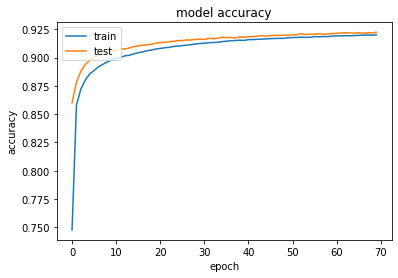

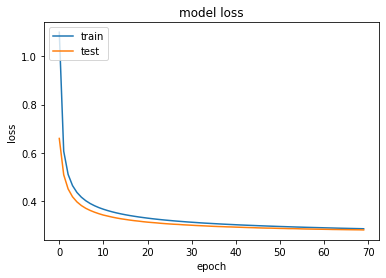

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper left')
plt.show()
#Summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [12]:
#Evaluate the Model
test_loss, test_acc = model_0.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.9221


In [13]:
model_0.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x62ca1fad0>>

In [14]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [15]:
from tensorflow.keras.layers import Dropout
#Most Common type of model is a stack of layer
model_1 = tf.keras.Sequential()
N_hidden = 64
#Adds a densely connected layer with 64 units to the model:
model_1.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Adding another dense layer
model_1.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
#After first layer you do not need to specify the size of input anymore
#Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [16]:
model_1.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
#Training the model
training = model_1.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 36us/sample - loss: 1.1754 - accuracy: 0.6958 - val_loss: 0.5053 - val_accuracy: 0.8743
Epoch 2/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4382 - accuracy: 0.8816 - val_loss: 0.3551 - val_accuracy: 0.9014
Epoch 3/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.3503 - accuracy: 0.9009 - val_loss: 0.3127 - val_accuracy: 0.9113
Epoch 4/100
48000/48000 [==============================] - 1s 30us/sample - loss: 0.3115 - accuracy: 0.9125 - val_loss: 0.2808 - val_accuracy: 0.9210
Epoch 5/100
48000/48000 [==============================] - 1s 31us/sample - loss: 0.2855 - accuracy: 0.9194 - val_loss: 0.2624 - val_accuracy: 0.9259
Epoch 6/100
48000/48000 [==============================] - 1s 30us/sample - loss: 0.2647 - accuracy: 0.9244 - val_loss: 0.2488 - val_accuracy: 0.9297
Epoch 7/100
48000/48000 [=========================

Epoch 55/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0571 - accuracy: 0.9844 - val_loss: 0.1051 - val_accuracy: 0.9688
Epoch 56/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0561 - accuracy: 0.9851 - val_loss: 0.1057 - val_accuracy: 0.9678
Epoch 57/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0549 - accuracy: 0.9846 - val_loss: 0.1056 - val_accuracy: 0.9678
Epoch 58/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0538 - accuracy: 0.9855 - val_loss: 0.1046 - val_accuracy: 0.9682
Epoch 59/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0527 - accuracy: 0.9856 - val_loss: 0.1042 - val_accuracy: 0.9678
Epoch 60/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0516 - accuracy: 0.9864 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 61/100
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0506 - ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


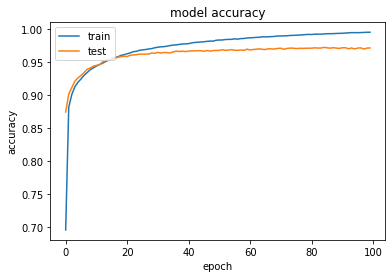

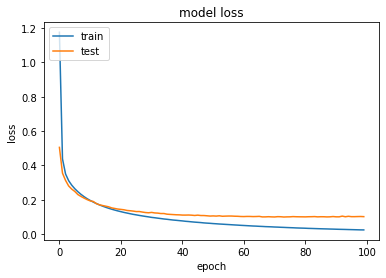

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#Summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [19]:
#Evaluate the model
test_loss,test_acc = model_1.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.9741


In [20]:
model_1.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x633499b90>>

In [21]:
model_1.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.04527941,  0.01382596,  0.07503378, ...,  0.02972316,
          0.04771657, -0.02282813],
        [ 0.06683873, -0.0501141 ,  0.06846941, ..., -0.04131557,
         -0.01927493,  0.06855965],
        [-0.03228267,  0.08374145,  0.06288151, ..., -0.00035354,
         -0.0307473 , -0.05703107],
        ...,
        [-0.00601339,  0.06455071, -0.01652325, ...,  0.01814985,
          0.05860391,  0.03662443],
        [-0.0694474 , -0.08238947,  0.02348388, ..., -0.01349282,
         -0.03885577,  0.07679335],
        [ 0.0081121 , -0.05318649, -0.06322681, ...,  0.05988351,
         -0.06104447,  0.04266242]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.00818673,  0.01931719,  0.04133044,  0.01660921,  0.12178285,
         0.14498502, -0.04738661,  0.17674753,  0.04037025,  0.07991288,
        -0.01731646,  0.00153597, -0.06019393, -0.06925688,  0.

In [22]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_con

In [23]:
##Adding dropout to avoid overfitting

In [24]:
from tensorflow.keras.layers import Dropout
#Most common type of layers is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
#Add a densely connected layer with 64 units to the model
model_2.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Now the model will take input arrays of shape (*,784)# and output arrays of shape (*,64)
model_2.add(Dropout(0.3))
#Add another dense layer
model_2.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
model_2.add(Dropout(0.3))
#Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [25]:
#Compile the model
model_2.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
#Training the model
training = model_2.fit(X_train,Y_train,epochs=100,batch_size=64,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 41us/sample - loss: 1.3491 - accuracy: 0.5706 - val_loss: 0.5481 - val_accuracy: 0.8678
Epoch 2/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.6593 - accuracy: 0.7994 - val_loss: 0.3723 - val_accuracy: 0.9002
Epoch 3/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.5166 - accuracy: 0.8444 - val_loss: 0.3140 - val_accuracy: 0.9117
Epoch 4/100
48000/48000 [==============================] - 2s 35us/sample - loss: 0.4510 - accuracy: 0.8659 - val_loss: 0.2834 - val_accuracy: 0.9183
Epoch 5/100
48000/48000 [==============================] - 2s 36us/sample - loss: 0.4061 - accuracy: 0.8801 - val_loss: 0.2585 - val_accuracy: 0.9250
Epoch 6/100
48000/48000 [==============================] - 2s 38us/sample - loss: 0.3721 - accuracy: 0.8903 - val_loss: 0.2407 - val_accuracy: 0.9292
Epoch 7/100
48000/48000 [=========================

48000/48000 [==============================] - 2s 37us/sample - loss: 0.1154 - accuracy: 0.9654 - val_loss: 0.0935 - val_accuracy: 0.9725s - loss: 0.115
Epoch 55/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1165 - accuracy: 0.9648 - val_loss: 0.0937 - val_accuracy: 0.9721
Epoch 56/100
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1131 - accuracy: 0.9662 - val_loss: 0.0917 - val_accuracy: 0.9732
Epoch 57/100
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1113 - accuracy: 0.9664 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 58/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1096 - accuracy: 0.9672 - val_loss: 0.0905 - val_accuracy: 0.9734
Epoch 59/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1097 - accuracy: 0.9670 - val_loss: 0.0909 - val_accuracy: 0.9735
Epoch 60/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1097 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


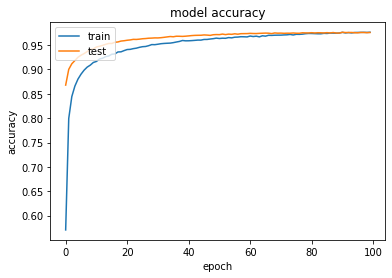

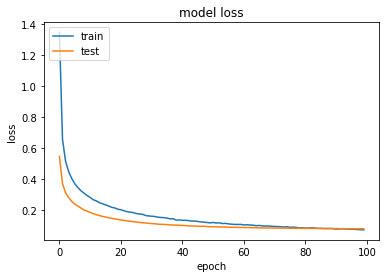

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#summarize trainign for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [28]:
#evaluate the model
test_loss,test_acc = model_2.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.9773


In [29]:
model_2.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x62ca66fd0>>

In [30]:
model_2.weights

[<tf.Variable 'dense_layer_4/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.00447921,  0.0209583 , -0.03881378, ..., -0.02592206,
         -0.05709033, -0.01828059],
        [-0.04992756,  0.02897663, -0.01521019, ..., -0.04576444,
         -0.06712329,  0.01356667],
        [-0.070311  ,  0.07446688,  0.03639919, ..., -0.03932389,
          0.0416488 ,  0.07073952],
        ...,
        [-0.06203982, -0.06215119,  0.03447323, ..., -0.06582177,
         -0.00084683, -0.03015961],
        [-0.00540134, -0.00663166, -0.04605598, ..., -0.00251804,
         -0.05273603,  0.04360121],
        [-0.05321869,  0.0059384 ,  0.0470875 , ...,  0.06206623,
          0.0059367 , -0.07347751]], dtype=float32)>,
 <tf.Variable 'dense_layer_4/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.06695201, -0.00768074, -0.04184556,  0.00444173,  0.01665776,
         0.11279459, -0.0141995 , -0.03441726,  0.04818951,  0.01040964,
         0.05621301,  0.00717083, -0.04793985, -0.12007194, -

In [31]:
model_2.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
  

In [32]:
#Changing the optimizer to Adam

In [33]:
model_3 = tf.keras.Sequential()
N_hidden = 64
#Add a Dendely connected layer with 64 units to the model:
model_3.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Now the model will take as input arrays of shape (*,784)# and output arrays of shape(*,64)
model_3.add(Dropout(0.3))
#Adding another dense layer
model_3.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
model_3.add(Dropout(0.3))
#After the first layer,you dont need to specify the size of the input anymore
#Add an output unit with 10 outout units (10 different classes):
model_3.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [34]:
#Compile the model
model_3.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
#Training the model
training = model_3.fit(X_train,Y_train,batch_size=128,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 27us/sample - loss: 0.7179 - accuracy: 0.7715 - val_loss: 0.2482 - val_accuracy: 0.9279
Epoch 2/30
48000/48000 [==============================] - 1s 17us/sample - loss: 0.3382 - accuracy: 0.9005 - val_loss: 0.1850 - val_accuracy: 0.9448
Epoch 3/30
48000/48000 [==============================] - 1s 16us/sample - loss: 0.2789 - accuracy: 0.9181 - val_loss: 0.1588 - val_accuracy: 0.9543
Epoch 4/30
48000/48000 [==============================] - 1s 16us/sample - loss: 0.2424 - accuracy: 0.9282 - val_loss: 0.1444 - val_accuracy: 0.9583
Epoch 5/30
48000/48000 [==============================] - 1s 17us/sample - loss: 0.2194 - accuracy: 0.9356 - val_loss: 0.1382 - val_accuracy: 0.9596
Epoch 6/30
48000/48000 [==============================] - 1s 17us/sample - loss: 0.2034 - accuracy: 0.9396 - val_loss: 0.1299 - val_accuracy: 0.9623
Epoch 7/30
48000/48000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


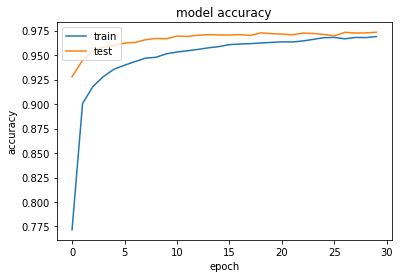

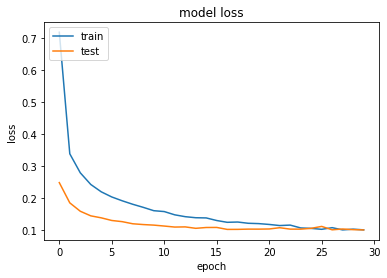

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
#Summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
#evaluate the model
test_loss,test_acc = model_3.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.976


In [38]:
model_3.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x62d5ba1d0>>

In [39]:
model_3.weights

[<tf.Variable 'dense_layer_5/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.07664035, -0.08060388,  0.05842301, ...,  0.04691025,
         -0.05287227, -0.04869179],
        [-0.02529647,  0.0610325 , -0.01973952, ..., -0.01703565,
          0.02891937,  0.04192708],
        [-0.04400144,  0.04035913,  0.063705  , ...,  0.04663124,
         -0.04797128,  0.02188473],
        ...,
        [-0.07387702,  0.0124776 , -0.05434527, ..., -0.02444144,
         -0.01439907, -0.06375532],
        [ 0.07400056,  0.06857102, -0.05897316, ..., -0.02366102,
         -0.02419442, -0.02912363],
        [ 0.03531335, -0.00686397,  0.04690724, ...,  0.04576843,
         -0.05543304,  0.04308664]], dtype=float32)>,
 <tf.Variable 'dense_layer_5/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.05234318, -0.00385084,  0.12981415,  0.07477476, -0.3952077 ,
         0.0160371 , -0.09580716,  0.25871778, -0.10830389,  0.04794187,
        -0.24955922,  0.00790262,  0.09587031,  0.16519615,  0.

In [40]:
model_3.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_2',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
  

In [43]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden=512
#Adds a densely connected layer with 64 units to the model
model_4.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Now the model will take as input arrays of shape(*,784)# and output arrays of shape(*,64)
model_4.add(Dropout(0.3))
#Adding another dense layer:
model_4.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
model_4.add(Dropout(0.3))
#After the first layer you do not need to specify# the size of the input anymore
#Add an output layer with 10 output units (10 different classes)
model_4.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [44]:
#Compiling the model
model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
#Training the model
training = model_4.fit(X_train,Y_train,batch_size=128,epochs=31,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/31
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3034 - accuracy: 0.9086 - val_loss: 0.1251 - val_accuracy: 0.9625
Epoch 2/31
48000/48000 [==============================] - 3s 61us/sample - loss: 0.1261 - accuracy: 0.9613 - val_loss: 0.0945 - val_accuracy: 0.9702
Epoch 3/31
48000/48000 [==============================] - 3s 55us/sample - loss: 0.0892 - accuracy: 0.9720 - val_loss: 0.0867 - val_accuracy: 0.9743
Epoch 4/31
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 5/31
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0808 - val_accuracy: 0.9764
Epoch 6/31
48000/48000 [==============================] - 3s 59us/sample - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0834 - val_accuracy: 0.9764
Epoch 7/31
48000/48000 [==============================] 

In [47]:
#evaluate the model 4
test_loss,test_acc = model_4.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.9816


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


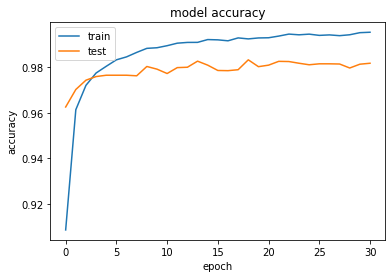

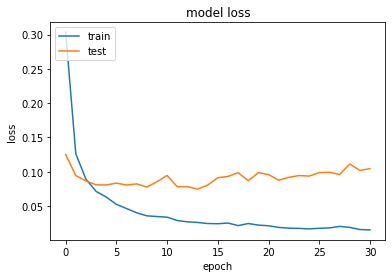

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [54]:
model_4.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x62ddc9690>>

In [55]:
model_4.weights

[<tf.Variable 'dense_layer_7/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.01532529, -0.05373105, -0.03193745, ...,  0.05443303,
         -0.0451368 ,  0.05485208],
        [ 0.03945777,  0.01810639,  0.05030023, ...,  0.00430469,
         -0.01513651,  0.04789497],
        [-0.0410162 , -0.04360645, -0.05209962, ...,  0.06657177,
          0.06243162,  0.05379046],
        ...,
        [ 0.03787427, -0.01584883, -0.06102339, ...,  0.03464575,
         -0.05771368,  0.06156957],
        [ 0.05565833,  0.05851746,  0.01674386, ...,  0.05508863,
         -0.06554805,  0.02192688],
        [ 0.00255612, -0.04842578,  0.05297992, ..., -0.02519291,
          0.00046057,  0.03762186]], dtype=float32)>,
 <tf.Variable 'dense_layer_7/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 0.00998229, -0.0429979 , -0.03904865,  0.06963339,  0.00022935,
        -0.07153013,  0.04069646, -0.06099808, -0.03445345, -0.03364357,
         0.07431115, -0.13582988,  0.03748804, -0.06605936,  

In [56]:
model_4.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_4',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},


In [ ]:
###Improved Model : Manipulating the batch size

In [58]:
#Most common type of model is a stakc of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
#Adds a densely connected layer with 64 units to the model:
model_5.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Now the model will take as input arrays of shape (*,784) and output arrays of shape(*,64)
model_5.add(Dropout(0.3))
#Adding another dense layer
model_5.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
model_5.add(Dropout(0.3))
#After the first layer you do not need to specify the size of input anymore
#Add an output layer with 10 different units (10 different classes):
model_5.add(Dense(10,name='dense_layer_3',activation='softmax'))


In [59]:
#Compiling the model
model_5.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
#Training the model
training = model_5.fit(X_train,Y_train,batch_size=64,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 92us/sample - loss: 0.2706 - accuracy: 0.9169 - val_loss: 0.1214 - val_accuracy: 0.9636
Epoch 2/30
48000/48000 [==============================] - 3s 72us/sample - loss: 0.1232 - accuracy: 0.9624 - val_loss: 0.1015 - val_accuracy: 0.9691
Epoch 3/30
48000/48000 [==============================] - 3s 73us/sample - loss: 0.0916 - accuracy: 0.9718 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 4/30
48000/48000 [==============================] - 4s 80us/sample - loss: 0.0762 - accuracy: 0.9768 - val_loss: 0.0856 - val_accuracy: 0.9750
Epoch 5/30
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0643 - accuracy: 0.9799 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 6/30
48000/48000 [==============================] - 4s 81us/sample - loss: 0.0561 - accuracy: 0.9822 - val_loss: 0.0877 - val_accuracy: 0.9746
Epoch 7/30
48000/48000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


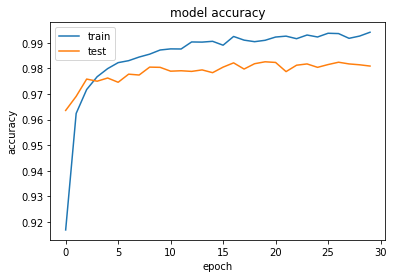

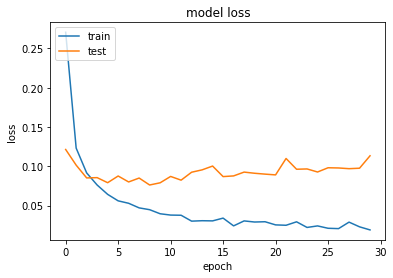

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [65]:
#evaluate the model
test_loss,test_acc  = model_5.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.9847


In [66]:
model_5.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x635a10550>>

In [67]:
model_5.weights

[<tf.Variable 'dense_layer_9/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.01239414,  0.0391546 , -0.03041302, ..., -0.02420816,
         -0.0046891 ,  0.06305723],
        [ 0.0381422 , -0.04638232, -0.0528465 , ..., -0.04963011,
          0.01605034,  0.01342518],
        [-0.020765  , -0.04567314, -0.04666279, ...,  0.04675928,
         -0.01056205,  0.0278461 ],
        ...,
        [ 0.05991766,  0.04575555, -0.04409143, ...,  0.00285769,
          0.01604526,  0.04566859],
        [-0.03255228,  0.05250151,  0.01932584, ...,  0.04330628,
          0.00030223, -0.06013553],
        [-0.03036606,  0.05259354,  0.06401761, ...,  0.06422383,
          0.03561859,  0.01951271]], dtype=float32)>,
 <tf.Variable 'dense_layer_9/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.05070307, -0.00463031, -0.0619285 ,  0.01566121, -0.04914298,
        -0.06848641,  0.08401227, -0.02884451, -0.02052708, -0.18106028,
        -0.12820375, -0.03768559, -0.16524866, -0.07124008, -

In [68]:
model_5.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_8',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},


In [ ]:
#Improved Model 6: Adding another hidden layer to the model

In [69]:
import tensorflow as tf
#In keras layers are assembled to build models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

#Add a densely connected layer with 64 units to the model:
model_6.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Now the model will take as input arrays of shape(*,784)# and output arrays of shape (*,64)
model_6.add(Dropout(0.3))

#Adding another dense layer:
model_6.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
model_6.add(Dropout(0.3))

#Adding another dense layer
model_6.add(Dense(N_hidden,name='dense_layer_3',activation='relu'))
model_6.add(Dropout(0.3))

#Adding an output layer with 10 output units (10 different classes)
model_6.add(Dense(10,name='dense_layer_4',activation='softmax'))



In [70]:
#Compiling the model
model_6.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
training = model_6.fit(X_train,Y_train,batch_size=64,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 7s 136us/sample - loss: 0.2957 - accuracy: 0.9088 - val_loss: 0.1287 - val_accuracy: 0.9622
Epoch 2/30
48000/48000 [==============================] - 6s 117us/sample - loss: 0.1408 - accuracy: 0.9580 - val_loss: 0.1006 - val_accuracy: 0.9719
Epoch 3/30
48000/48000 [==============================] - 5s 105us/sample - loss: 0.1071 - accuracy: 0.9676 - val_loss: 0.1013 - val_accuracy: 0.9718
Epoch 4/30
48000/48000 [==============================] - 5s 106us/sample - loss: 0.0940 - accuracy: 0.9713 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 5/30
48000/48000 [==============================] - 5s 106us/sample - loss: 0.0811 - accuracy: 0.9754 - val_loss: 0.0824 - val_accuracy: 0.9753
Epoch 6/30
48000/48000 [==============================] - 5s 108us/sample - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0836 - val_accuracy: 0.9780
Epoch 7/30
48000/48000 [==========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


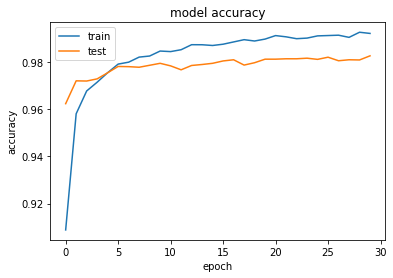

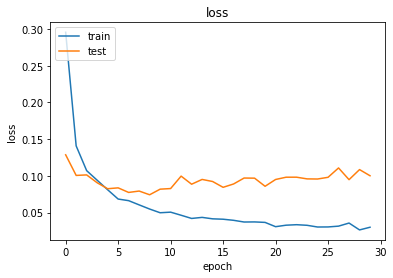

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [75]:
#Evaluate the model
test_loss,text_acc = model_6.evaluate(X_test,Y_test)
print('Test Accuracy',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy 0.9847


In [76]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x62d49d990>>

In [77]:
model_6.weights

[<tf.Variable 'dense_layer_10/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.05555142, -0.01459403, -0.02549826, ..., -0.01281524,
         -0.02995622, -0.04991298],
        [-0.05936862,  0.00128504,  0.03462929, ..., -0.04943586,
         -0.05396384,  0.04659589],
        [ 0.02102276,  0.00491488, -0.01827604, ...,  0.02034765,
          0.02416063, -0.0498052 ],
        ...,
        [ 0.05090173,  0.03685246, -0.04757615, ...,  0.05330518,
          0.04023336,  0.04728305],
        [ 0.02242593, -0.0125049 ,  0.04854453, ..., -0.01574977,
          0.03444963, -0.02028341],
        [-0.0587378 ,  0.04522736,  0.02548505, ..., -0.06515563,
          0.01465899, -0.03463526]], dtype=float32)>,
 <tf.Variable 'dense_layer_10/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.04974601, -0.03724839, -0.17029111, -0.04179266,  0.01836559,
        -0.08090643,  0.00046837, -0.06571268, -0.02287931, -0.11420621,
        -0.0023269 , -0.09878144, -0.02904896, -0.14684066,

In [78]:
model_6.get_config()

{'name': 'sequential_8',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_10',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},